# Pairs Trading with Distance Method(DM)

## References:
- Distance Approach in Pairs Trading: Part I.https://hudsonthames.org/distance-approach-in-pairs-trading-part-i/
- Introduction to Distance Approach in Pairs Trading: Part II.https://hudsonthames.org/introduction-to-distance-approach-in-pairs-trading-part-ii/
- ArbitrageLab Presentation by Illya Barziy. https://docs.google.com/presentation/d/1oFpv7OUi3W9F2D30rEQRy_Ra5ejLtlCMnk9nTJnMDr4/edit#slide=id.gb6709680a6_0_273
- Distance Approach in Paris Trading- Part 1. https://docs.google.com/presentation/d/1KrBUsROvx6aeFrsVbI1CgwIcH-VTD4xWVSlQKnknvR4/edit#slide=id.gd7dda458c4_0_232
- Pairs trading.Pair selection.Distance(Part 1). https://medium.com/@financialnoob/pairs-trading-pair-selection-distance-5ac4aeef0de0
- Distance Approach in Pairs Trading - Part 2. https://docs.google.com/presentation/d/1YjEHkEVn9T9K8UlWfO63qLU2qgU63cHxnO8xGFpxpHs/edit#slide=id.p1
- Statistical arbitrage pairs trading strategies: Review and outlook.
- Introduction to the Hurst exponent — with code in Python. https://towardsdatascience.com/introduction-to-the-hurst-exponent-with-code-in-python-4da0414ca52e
- Pairs Trading with Stocks. Quantpedia. https://quantpedia.com/strategies/pairs-trading-with-stocks/
- 量化投资实战（二）之配对交易策略---最短距离法. https://blog.csdn.net/qq_33499889/article/details/109839750
- Half-Life in Mean Reversion Processes. http://marcoagd.usuarios.rdc.puc-rio.br/half-life.html
- Truth value of series is ambiguous(Debug).https://www.w3docs.com/snippets/python/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-or-a-all.html

## Procedure:
1. Security selection
2. Price normalization
3. Eulidean distance calculation(can be replaced with alternative distance method)
4. Pairs selection
5. Position entry and exit rules


### Data Preperation:
- 1962-2002 US liquid stocks

### Pairs Formation

#### 1. Normalization
- Formula: $P_{normalized}=\frac{P-min(P)}{max(P)-min(P)}$
- Effects: shift the stock prices' range to $[0,1]$

#### 2. Distance Calculation for Normalized Prices
- Formula: $SSD=\sum_{t=1}^{N}(P_t^1-P_t^2)^2$
- picking $top \space n$ pairs with smallest distance, normally we select $n=20$

#### 3. Calculate the Historical Spread Volatility(std)
- Formula: $\sigma=\sqrt[2]{\frac{\sum(x_i-\mu)^2}{N-1}}$
- it is regarded as threshold to enter/exit the trade during the trading period

### Trading Period

1. **Normalizing** the prices in trading period using $min(P)$ and $max(P)$
2. Calculating `pairs spreads` in the trading period
  - the portfolio value series are differences between normalized price series of elements in pairs.
3. Generating trading signals
  - if spread value> 2$\sigma$  → **sell** signal
  - when spread crosses 0 → **close open** position
  - if spread value < -2$\sigma$ → **buy** signal
4. Strategy Application Details:
  - Time period: Trains(formation period) for 12 months, Test(trading period) for 6 months
  - Threshold: $2\sigma$
  - Number of Pairs: $n=20$

### Strategy Variations 

- Pairs formation/ trading period duration
- number of pairs chosen
- Signal generation sensitivity
- Weights in *portfolio* of pairs
- Weights of *assets* in each pair


## Other Alternative Distance Approach with Different Pairs Selection Method

1. pairs with smallest distance(basic approach with $SSD$)
2. pairs with **same industry group** calculating their SSDs, then n closest pairs are selected. 
  - More porfitable pairs will obtained by adding one more criterion than the basic one.
3. Choose $top \space n$ pairs with a higher **number of zero-crossings**
  - zero-crossing: the function has an intercept with x-axis
  - Intuition: 
    - it measures the frequency of *divergence and convergence* between two assets
    - track each other and exhibit frequent deviations that *reversed* under the force of arbitrage.
  - Statistical expression: $Pairs \space return_i=Constant+a_1TimeTrend+a_2SSD_i+a_3SSD_i^2+a_4log(Zero-crossings)+a_5SameIndustryFlag+a_6IndustryVolatility_i+a_7(IndustryVolatility_i)^2+e_i$
    - $a_4$: coefficient of factors affecting pairs return is *statistically signifiant*, has a **postive effect** on pairs return. 
    - pairs trading with higher number of zeros-crossings, the higher profitability.
4. Pairs with a higher historical pricing **standard deviation**
  - **Limitation** of SSD method:
    - Formula: $\bar{SSD_{ijt}}=\frac{1}{T}\sum_{t=i}^T(P_{it}-P_{jt})^2=Var(P_{it}-P_{jt})+[\frac{1}{T}\sum_{t=i}^T(P_{it}-P_{jt})^2]^2$
      - Rewrite the funciton: spread variance: $Var(P_{it}-P_{jt})=\frac{1}{T}\sum_{t=i}^T(P_{it}-P_{jt})^2-[\frac{1}{T}\sum_{t=i}^T(P_{it}-P_{jt})^2]^2$
    - Intuition: 
      - lowing SSD should companied with minimum <u>the sum of spread variance and squared spread mean</u>
      - But if we want to *get more profit potientially*, we should expect the variance of spread much more higher!
5. Selecting pairs with low enough **half-life of mean reversion**
  - the average time it takes to get pulled half-way back to the mean
6. Selecting only pairs with **Hurst exponent** < 0.5
  - Hurst Exponent($H$):
    - a measure of long-term memory and the amount series deviates from a <u>random walk</u>.
    - related to <u>trending pattern</u> and <u>mean-reverting pattern</u>
    - range $[0,1]$, the higher H, the stock market's future prices are likely to be more similar to its past prices.
      - $H < 0.5$: a **mean-reverting** series
         - anti-persistent, eg: high value closely followed by low value.
         - the closer the value to $0$, the stronger mean-reversion pattern is.
      - $H = 0.5$: geometric **random walk**
      - $H > 0.5$: a **trending series**
         - persistent series, eg: high value closely followed by a higher one.
7. Selecting $top \space n$ pairs with highest **Pearson correlation coefficient**
  - Pearson Correlation on returns formula: $D_{ijt}=\beta(R_{it}-R_f)-(R_{jt}-R_f)$
    - $D$: return divergence
    - $\beta$: regression coefficient of stock i monthly return on its pair's return.
  - Portfolio construction: order the stock in descend in terms of pervious month's return divergence($D$), pick $top \space n$ stocks.
  - Portfolio Formation:
    1. Data Preprocessing
      - Data split:
         - Training(Formation period) set: price data from year $t-4$ to year $t$(5 year in total)
         - Testing(Trading period) set: price data at year $t+1$
      - Data manipulation
        - for getting pairs' correlation, if there exists $m$ stocks, the numbers of correlation needed to compute is $m(m-1)/2$
        - for reduce computational burden, we use <u>monthly data</u>
    2. Pairs Portfolio Formation
      - Finding pairs with *top n highest* correlation coefficient
      - Weights allocation(3 ways):
         - Simple OLS of Returns of pairs portfolio:
           - Formula: $R_{jt}=\alpha+\beta*R_{it}$, we can get $\beta$ in this step by linear regression
         - Equal-weighted portfolio: with <u>equal-weighted average returns</u> of top n pairs of stocks
         - Correlation-weighted portfolio: 
           - Formula: $w_k=\frac{\rho_{k}}{\sum_{i=1}^n \rho_i}$
             - $k$: *benchmark portfolio* for each of stock
    3. Trading Signal Generation
      - Assumption: About $D$, if *individual stock return* <u>deviates</u> from its *pairs portfolio returns*, in the following month the divergence should be *reversed* in trading period($t+1$ year). 
      - Trading Signal:
         1. sort stocks in descending order in terms of perious monthly $D_{ijt}$
         2. given the percentages of long, short stocks: 
           - top $p$% of sorted stock→long 
           - bottom $q$% of sorted stock→short
        3. Special Case:
          -  *Dollar neutral* portfolio construction: long decile 10 and short decile 1. Then held for one month.
             - Dollar neutral definition: long side & short side in dollar will completely offset each other, so net=0 in dollar notional terms.
  - Comparison with Basic Distance Method
     1. Pearson correlation restricts less than SSD method
       - PC takes advantage of `Variance of Return Spread`
         - seeking higher pearson correlation needs **lower** vairance of return spreads.
         - Formula: $Var(R_{it}-R_{jt})=Var(R_{it})+Var(R_{jt})-2r(R_{it},R_{it})\sqrt[2]{R_{it}}\sqrt[2]{R_{jt}}$
           - return correlation: $2r(R_{it},R_{it})$
       - SSD takes advantage of `Variance of Price Spread`
         - minimizing SSD needs **lowing** variance of price spread
           - if the pairs are <u>perfectly correlated</u> and price time series have the <u>same variance</u>, the variance of price spread→0.
           - Finally, SSD method gets pairs with <u>similar low variance and higher correlation</u> of stock prices. As a result, the selection metric is stricter than that of PC.
         - Formula: $Var(P_{it}-P_{jt})=Var(P_{it})+Var(P_{jt})-2r(P_{it},P_{it})\sqrt[2]{P_{it}}\sqrt[2]{P_{jt}}$
           - Price correlation: $2r(P_{it},P_{it})$
    2. Pearson correlation provides higher level information
      - the return divergences mostly caused by **idiosyncratic movements** of stock i, have potential to *reverse*.
      - **Quasi-multivariate pairs trading**($P_{it}=\sum_{k=1}^nw_kP_{kt}$) leads to <u>higher and more robust</u> annual excess returns than univariate pairs trading ($P_{jt}$)
         - Notions:
           - $P_{kt}$: linear combination of price time series
           - $w_k$: the weights are rolling calculated, for every 10 days, the weights are re-estimated by three ways we have mentioned above, using past 2 years' return.
         - Trading signal: 
           - open: spread between 2 price time series, exceed threshold $k$
           - close: spread below threhold $k$
         - This method <u>reduces high transaction prices</u>.



## Basic Distance Approach Implementation

In [1]:
import pandas as pd
import numpy as np
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
!pip install backtrader
import backtrader as bt
!pip install pyfolio
import pyfolio as pf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
#import stocks from yfinance
tickers = ['META','AMZN','AAPL','INTC','MSFT','GOOG','NFLX','IBM','EBAY','QCOM','AMD','ORCL','ADBE','HPQ','SAP','NVDA','GRPN','DELL','CSCO']
startDate='2017-01-01'
endDate='2022-12-31'
prices=yf.download(tickers,startDate,endDate,progress=False)['Adj Close']

In [3]:
prices.head()

,AAPL,ADBE,AMD,AMZN,CSCO,DELL,EBAY,GOOG,GRPN,HPQ,IBM,INTC,META,MSFT,NFLX,NVDA,ORCL,QCOM,SAP
Date,,,,,,,,,,,,,,,,,,,
2017-01-03,27.133322,103.480003,11.43,37.683498,24.954926,14.826542,27.971762,39.306999,70.000000,12.282251,119.605804,30.613668,116.860001,57.501350,127.489998,25.142952,34.786842,54.375095,77.990295
2017-01-04,27.102957,104.139999,11.43,37.859001,24.806578,14.943373,27.896772,39.345001,70.199997,12.472479,121.086693,30.454733,118.690002,57.244068,129.410004,25.729563,34.958282,54.433308,78.315628
2017-01-05,27.240786,105.910004,11.24,39.022499,24.864271,15.016731,28.131117,39.701000,73.199997,12.464210,120.686081,30.404549,120.669998,57.244068,131.809998,25.076403,34.868057,54.499821,79.391037
2017-01-06,27.544470,108.300003,11.32,39.799500,24.913715,15.429710,29.106005,40.307499,70.599998,12.406315,121.279831,30.513294,123.410004,57.740261,131.070007,25.411612,34.696602,54.483173,79.951340
2017-01-09,27.796766,108.570000,11.49,39.846001,24.872513,15.348201,28.824791,40.332500,70.400002,12.141644,119.934929,30.622030,124.900002,57.556477,130.949997,26.441875,35.219990,54.582954,80.755646


In [4]:
returns=prices.pct_change().dropna()

In [5]:
returns.head()

,AAPL,ADBE,AMD,AMZN,CSCO,DELL,EBAY,GOOG,GRPN,HPQ,IBM,INTC,META,MSFT,NFLX,NVDA,ORCL,QCOM,SAP
Date,,,,,,,,,,,,,,,,,,,
2017-01-04,-0.001119,0.006378,0.000000,0.004657,-0.005945,0.007880,-0.002681,0.000967,0.002857,0.015488,0.012381,-0.005192,0.015660,-0.004474,0.015060,0.023331,0.004928,0.001071,0.004171
2017-01-05,0.005085,0.016996,-0.016623,0.030732,0.002326,0.004909,0.008400,0.009048,0.042735,-0.000663,-0.003308,-0.001648,0.016682,0.000000,0.018546,-0.025386,-0.002581,0.001222,0.013732
2017-01-06,0.011148,0.022566,0.007117,0.019912,0.001989,0.027501,0.034655,0.015277,-0.035519,-0.004645,0.004920,0.003577,0.022707,0.008668,-0.005614,0.013368,-0.004917,-0.000305,0.007058
2017-01-09,0.009160,0.002493,0.015018,0.001168,-0.001654,-0.005283,-0.009662,0.000620,-0.002833,-0.021334,-0.011089,0.003564,0.012074,-0.003183,-0.000916,0.040543,0.015085,0.001831,0.010060
2017-01-10,0.001008,-0.002855,-0.004352,-0.001280,0.006627,0.008851,-0.016260,-0.002306,0.000000,0.000681,-0.012705,-0.001912,-0.004404,-0.000319,-0.008095,-0.007550,-0.009480,-0.000305,-0.008169


In [6]:
#split the dataset for train and test
returns_train=returns.loc[:'2021-12-31']
returns_test=returns.loc['2022-01-01':]
prices_train=prices.loc[returns_train.index]
prices_test=prices.loc[returns_test.index]

In [7]:
#print the length
prices_train = prices_train.iloc[1:]
returns_train = returns_train.iloc[1:]

In [8]:
#change prices to cumulative returns
returns_cum=(1+returns).cumprod()
returns_cum=returns_cum/returns_cum.iloc[0]
returns_cum_train = returns_cum.loc[returns_train.index]
returns_cum_test = returns_cum.loc[returns_test.index]
returns_cum.head()

,AAPL,ADBE,AMD,AMZN,CSCO,DELL,EBAY,GOOG,GRPN,HPQ,IBM,INTC,META,MSFT,NFLX,NVDA,ORCL,QCOM,SAP
Date,,,,,,,,,,,,,,,,,,,
2017-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-05,1.005085,1.016996,0.983377,1.030732,1.002326,1.004909,1.008400,1.009048,1.042735,0.999337,0.996692,0.998352,1.016682,1.000000,1.018546,0.974614,0.997419,1.001222,1.013732
2017-01-06,1.016290,1.039946,0.990376,1.051256,1.004319,1.032545,1.043347,1.024463,1.005698,0.994695,1.001595,1.001923,1.039767,1.008668,1.012827,0.987643,0.992514,1.000916,1.020886
2017-01-09,1.025599,1.042539,1.005249,1.052484,1.002658,1.027091,1.033266,1.025098,1.002849,0.973475,0.990488,1.005493,1.052321,1.005457,1.011900,1.027685,1.007486,1.002749,1.031156
2017-01-10,1.026633,1.039562,1.000875,1.051137,1.009302,1.036182,1.016465,1.022735,1.002849,0.974138,0.977904,1.003571,1.047687,1.005136,1.003709,1.019925,0.997935,1.002444,1.022732


In [9]:
#select pairs based on SSD 
from tqdm import tqdm
pairs_df = pd.DataFrame(columns=['Spread SSD', 'Spread Volatility'])
stocks = returns_cum.columns

for s1 in tqdm(stocks):
    for s2 in stocks:
        if (s1!=s2) and (f'{s2}-{s1}' not in pairs_df.index):
            spread =returns_cum_train[s1] - returns_cum_train[s2]
            ssd = np.sum(spread**2) / len(spread) #SSD for pairs selecting
            std = spread.std() #Historical Spread Volatility for trading signal construction
            pairs_df.loc[f'{s1}-{s2}', ['Spread SSD', 'Spread Volatility']] = ssd, std

100%|██████████| 19/19 [00:00<00:00, 58.69it/s]


In [10]:
pairs_df.sort_values(by='Spread SSD')

,Spread SSD,Spread Volatility
EBAY-ORCL,0.034097,0.181723
INTC-SAP,0.043193,0.207873
HPQ-ORCL,0.056452,0.232279
DELL-GOOG,0.061571,0.230669
CSCO-ORCL,0.07359,0.259769
...,...,...
AMD-CSCO,14.236412,2.951006
AMD-SAP,15.228635,2.992256
AMD-INTC,15.371629,3.019385
AMD-IBM,19.294849,3.159231


In [11]:
selected_pairs=pairs_df.sort_values(by='Spread SSD').iloc[:10]
selected_pairs

,Spread SSD,Spread Volatility
EBAY-ORCL,0.034097,0.181723
INTC-SAP,0.043193,0.207873
HPQ-ORCL,0.056452,0.232279
DELL-GOOG,0.061571,0.230669
CSCO-ORCL,0.07359,0.259769
CSCO-INTC,0.076295,0.232159
GOOG-META,0.079455,0.27932
CSCO-SAP,0.082106,0.241873
CSCO-HPQ,0.086554,0.292973
ORCL-SAP,0.092444,0.294698


- From the sorting results, we find out stock pairs with top10 smallest SSD.

In [12]:
def parse_pair(pair):
    s1 = pair[:pair.find('-')]
    s2 = pair[pair.find('-')+1:]
    return s1,s2

sharpe_ratio = pd.DataFrame(index=selected_pairs.sort_values(by='Spread SSD'), columns=['Sharpe'])

for pair in selected_pairs.index:
  s1,s2=parse_pair(pair)
  spread = returns_cum_train[s1] - returns_cum_train[s2]
  std = selected_pairs.loc[pair]['Spread Volatility']
  #set up positions
  positions = pd.DataFrame(index=spread.index, columns=[s1,s2])
  #initialize the short and long position indicators
  short = False
  long = False

  for t in spread.index:
     #open short position
    if spread.loc[t]>2*std: 
      short=True
      positions.loc[t]=[-1,1] 
    #open long position
    elif spread.loc[t]<-2*std:
      long=True
      positions.loc[t]=[1,-1]
    #close short position
    elif short and spread.loc[t]<0:
      short=False
      positions.loc[t]=[0,0]
    #close long position
    elif long and spread.loc[t]>0:
      long=False
      positions.loc[t]=[0,0]
  positions.fillna(method='ffill', inplace=True)
  positions.fillna(0,inplace=True)
  returns_pairs=(positions.shift() * returns_train[[s1,s2]]).sum(axis=1)
  sharpe_ratio.loc[pair] = np.sqrt(252) * np.nanmean(returns_pairs) / np.nanstd(returns_pairs)

In [13]:
#only select the pairs whose Sharpe Ratio>1
threshold1 = sharpe_ratio['Sharpe'] > 1
sharpe_ratio.loc[threshold1].sort_values(by='Sharpe', ascending=False)

,Sharpe
CSCO-HPQ,1.498607
HPQ-ORCL,1.105914
INTC-SAP,1.068237
EBAY-ORCL,1.009961


In [14]:
#store these 4 selected pairs into a variable
final_pairs = sharpe_ratio.loc[threshold1].sort_values(by='Sharpe', ascending=False).index
final_pairs

Index(['CSCO-HPQ', 'HPQ-ORCL', 'INTC-SAP', 'EBAY-ORCL'], dtype='object')

In [15]:
#write a function to get pairs returns and store it into a dataframe
pair_returns = pd.DataFrame(index=returns_test.index, columns=final_pairs)

for pair in final_pairs:
    s1,s2 = parse_pair(pair)
    
    # construct spread
    spread = returns_cum_test[s1] - returns_cum_test[s2]
    std = pairs_df.loc[pair]['Spread Volatility'] 
    positions = pd.DataFrame(index=returns_test.index, columns=[s1,s2])
    short = False
    long = False
    
    for t in spread.index:
        if spread.loc[t] > 2*std:
            short = True
            positions.loc[t] = [-1,1] 
        elif spread.loc[t] < -2*std:
            long = True
            positions.loc[t] = [1,-1] 
        elif short and spread.loc[t] < 0:
            short = False
            positions.loc[t] = [0,0] 
        elif long and spread.loc[t] > 0:
            long = False
            positions.loc[t] = [0,0]
    positions.fillna(method='ffill', inplace=True)
    positions.fillna(0, inplace=True)
    returns = (positions.shift() * returns_test[[s1,s2]]).sum(axis=1)
    pair_returns[pair] = returns

In [16]:
pair_cumreturns = (1 + pair_returns).cumprod()
pair_cumreturns

,CSCO-HPQ,HPQ-ORCL,INTC-SAP,EBAY-ORCL
Date,,,,
2022-01-03,1.000000,1.000000,1.000000,1.000000
2022-01-04,1.000000,0.979658,1.000000,1.000000
2022-01-05,0.992582,0.961660,1.000000,1.000000
2022-01-06,1.007972,0.968594,1.000000,1.000000
2022-01-07,1.012228,0.982470,1.000000,1.000000
...,...,...,...,...
2022-12-23,1.014413,1.100116,0.911145,0.755948
2022-12-27,1.003730,1.100116,0.907315,0.753038
2022-12-28,1.013667,1.100116,0.906757,0.756077


Text(0.5, 1.0, 'Cumulative Return for Each Pair')

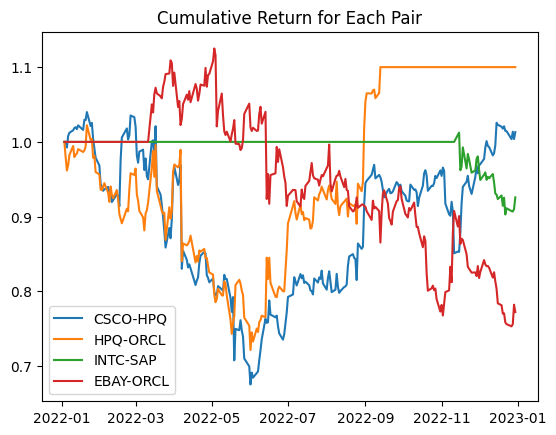

In [17]:
#plot the cumulative return for each pair
plt.plot(pair_cumreturns['CSCO-HPQ'])
plt.plot(pair_cumreturns['HPQ-ORCL'])
plt.plot(pair_cumreturns['INTC-SAP'])
plt.plot(pair_cumreturns['EBAY-ORCL'])
plt.legend(['CSCO-HPQ','HPQ-ORCL','INTC-SAP','EBAY-ORCL'])
plt.title('Cumulative Return for Each Pair')

Text(0.5, 1.0, 'Total Traded Pairs Return Rate')

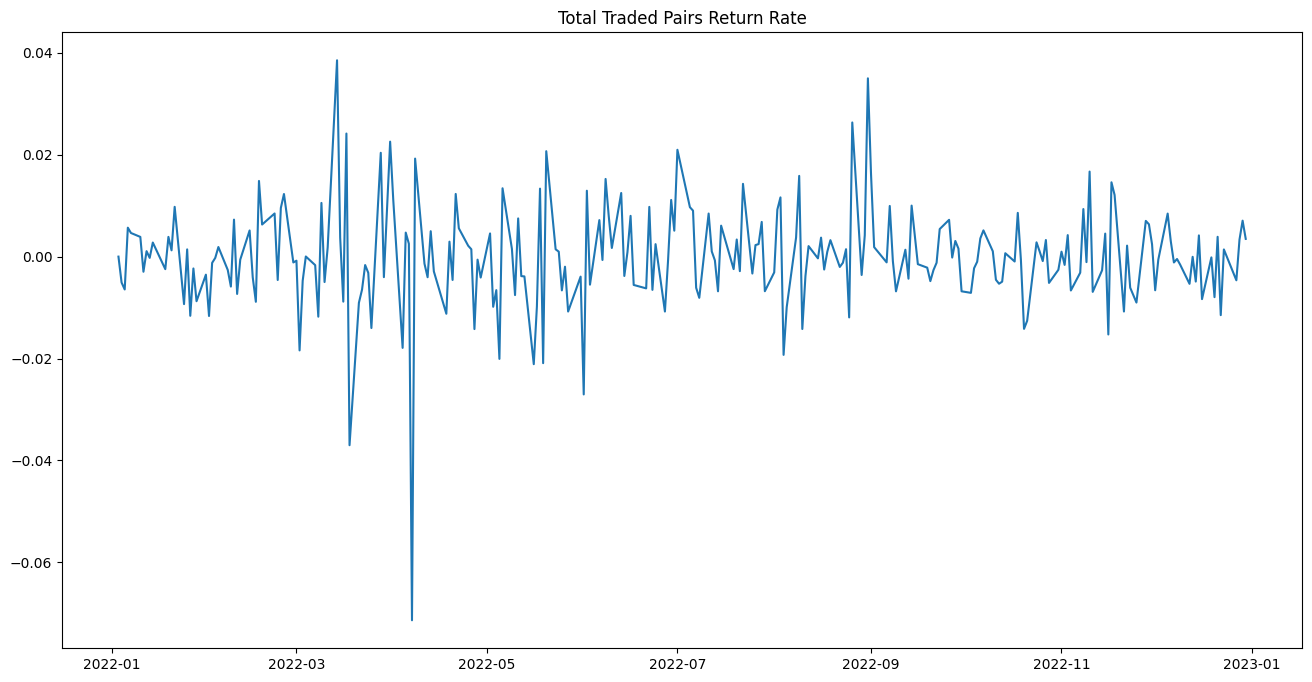

In [18]:
#plot the total return rate
total_returns = pair_returns.sum(axis=1) / len(pair_returns.columns)
plt.figure(figsize=(16,8))
plt.plot(total_returns)
plt.title('Total Traded Pairs Return Rate')

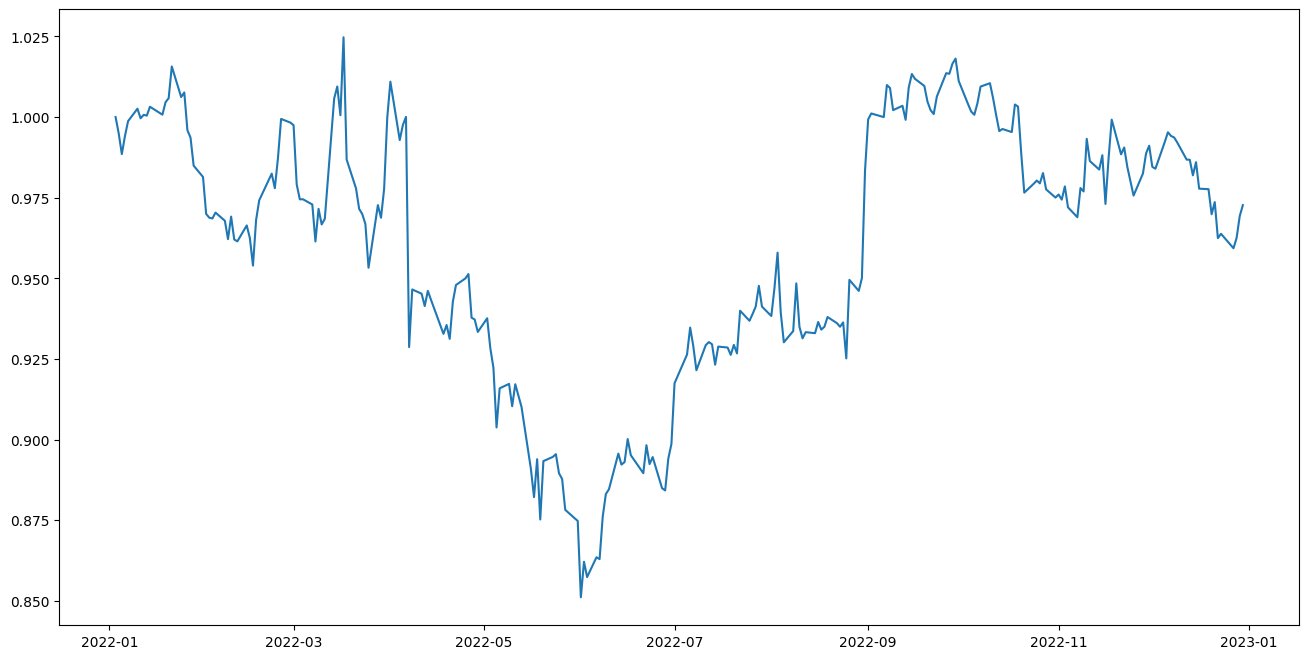

In [19]:
total_cumreturns = (1 + total_returns).cumprod()
plt.figure(figsize=(16,8))
plt.plot(total_cumreturns)

In [20]:
#get benchmark data
benchmark=yf.download('^GSPC','2022-01-01',endDate)['Adj Close'].pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


In [21]:
benchmark.head()

Date
2022-01-04   -0.000630
2022-01-05   -0.019393
2022-01-06   -0.000964
2022-01-07   -0.004050
2022-01-10   -0.001441
Name: Adj Close, dtype: float64

In [22]:
# remove your installed pyfolio library
!pip uninstall pyfolio
# Install it again from its github repo
!pip install git+https://github.com/quantopian/pyfolio

Found existing installation: pyfolio 0.9.2+75.g4b901f6
Uninstalling pyfolio-0.9.2+75.g4b901f6:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/pyfolio-0.9.2+75.g4b901f6.dist-info/*
    /usr/local/lib/python3.9/dist-packages/pyfolio/*
Proceed (Y/n)? Y
  Successfully uninstalled pyfolio-0.9.2+75.g4b901f6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-jqbz74kh
  Running command git clone --filter=blob:none --quiet https://github.com/quantopian/pyfolio /tmp/pip-req-build-jqbz74kh
  Resolved https://github.com/quantopian/pyfolio to commit 4b901f6d73aa02ceb6d04b7d83502e5c6f2e81aa
  Preparing metadata (setup.py) ... done
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75775 sha256=5a8bf36d64a3405eb3550a296d5660e2ceb1687d472f8d166544ce54a0ec4b4a
  Stored in directory: /tmp/pip-ephem-wheel-cache-mafgw0ji/wheels/b2/62/f1/189c72

/usr/local/lib/python3.9/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2022-01-04
End date,2022-12-30
Total months,11
,Backtest
Annual return,-2.753%
Cumulative returns,-2.732%
Annual volatility,16.306%
Sharpe ratio,-0.09
Calmar ratio,-0.16
Stability,0.02
Max drawdown,-16.942%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.94,2022-03-17,2022-06-01,NaT,NaN
1,6.08,2022-01-21,2022-02-16,2022-03-17,40
2,0.64,2022-01-04,2022-01-05,2022-01-07,4
3,0.30,2022-01-10,2022-01-11,2022-01-14,5
4,0.25,2022-01-14,2022-01-18,2022-01-19,4


/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.9/dist-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warni

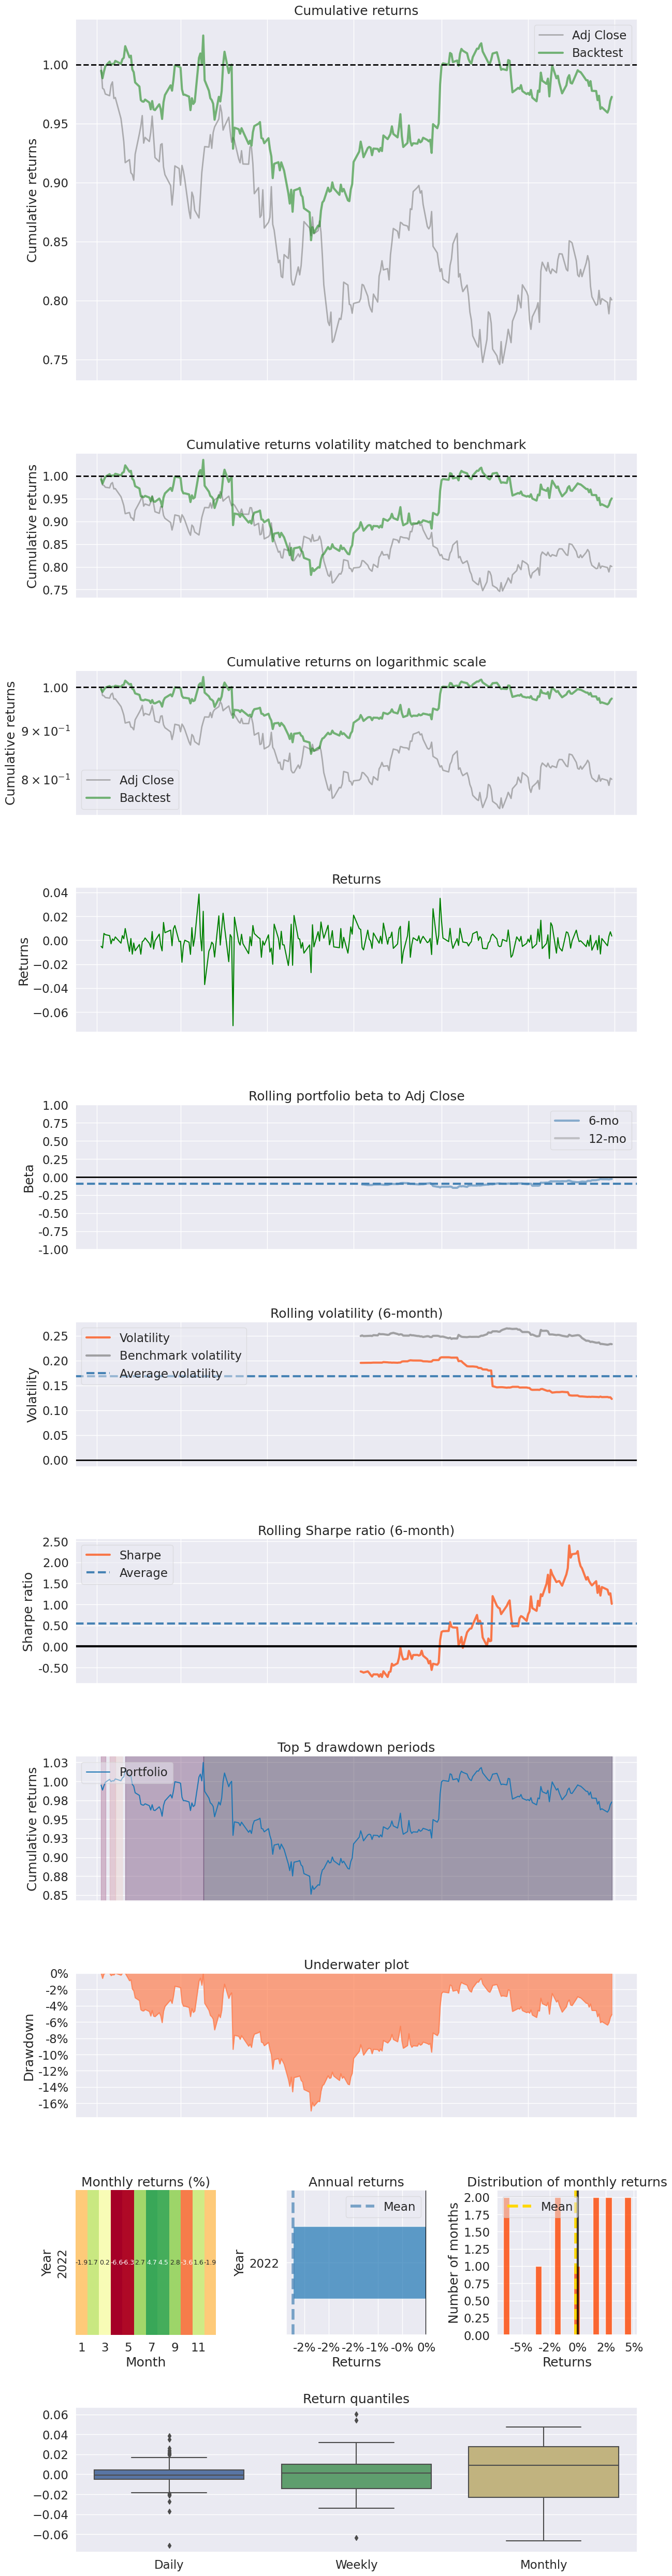

In [23]:
performance= pf.create_returns_tear_sheet(total_returns, benchmark_rets=benchmark)

## Advanced Methods and Optimization for Pairs Selection

In [719]:
#use software indursty stocks
risky_assets=['ABST','ACIW','ACN','ADBE','ADSK','AKAM','ANSS','APPS','AVID','AZPN','BB','BL','BLKB','BR','CDW','CDNS','CHKP','CLSK','CRM','CTSH','DOX','EEFT','EPAM','FICO','FISV','FTNT','GDDY','GEN','GIB','IBM','INFY','INTU','IT','T','JKHY','LDOS','MANH','MDB','AAPL','AMZN','GOOG','MODN','MSFT','MSTR','NICE','NOW','ORCL','OTEX','PANW','PCTY','PTC','QLYS','ROP','SAP','SHOP','SNPS','SPLK','SQ','SSNC','TEAM','TTD','TYL','VMW','VRSN','WDAY','WIT']
SD='2020-01-01'
ED='2023-03-31'
price=yf.download(risky_assets,SD,ED,progress=False)['Adj Close']

In [720]:
#calculate the selected stocks' cumulative returns 
cumret=np.log(price).diff().cumsum()+1
cumret.dropna(inplace=True)

In [721]:
#import libraries we need
import statsmodels
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
!pip install hurst
import hurst
from hurst import compute_Hc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [722]:
# define functions to calculate different metrics for pairs selection
def parse_pair(pair):
  '''
  return the pairs with format of 's1-s2'
  '''
  dp = pair.find('-')
  s1 = pair[:dp]
  s2 = pair[dp+1:]
  return s1,s2

def CADF_pvalue(s1,s2,cumret):
  '''
  conduct CADF Cointegration tests
  the order of two stocks in the same pair is important, hence we need to test both s1-s2 and s2-s1
  return the smallest p-value of two tests
  '''
  p1 = coint(cumret[s1], cumret[s2])[1]
  p2 = coint(cumret[s2], cumret[s1])[1]
  return min(p1,p2)

def half_life(spread):
  '''
  calculate the half-life of spread mean reversion
  '''
  #variables creation and preprocessing
  ylag=spread.shift()
  deltay=spread - ylag
  ylag.dropna(inplace=True)
  deltay.dropna(inplace=True)
  #OLS regression
  residual=OLS(deltay, add_constant(ylag)).fit()
  halflife=-np.log(2)/residual.params[0]
  return halflife

def feature_metrics(pairs, cumret, pairs_df):
  '''
  calculate the selection pairs features
  - Spread SSD
  - CADF p-value 
  - ADF p-value
  - Spread Volatility: historical standard deviation
  - Pearson Correlation of stock prices and its pair' price
  - Numbers of Zero-Crossing
  - Hurst Exponenet(HE)
  - Halflife of Mean Reversion
  '''
  metrics=['Spread SSD','CADF p-value','ADF p-value','Spread Volatility','Pearson Correlation','Numbers of Zero-Crossing','Hurst Exponent','Half Life']
  results= pd.DataFrame(index=pairs, columns=metrics) #combined them into a single dataframe

  for pair in pairs:
    s1,s2=parse_pair(pair)         #declare the pair name
    spread=cumret[s1]-cumret[s2]   #calculate the spread cummulative returns
    #calculate the individual feature
    results.loc[pair]['Spread SSD']=np.sqrt(np.sum((spread)**2))
    results.loc[pair]['CADF p-value']=CADF_pvalue(s1, s2, cumret)
    results.loc[pair]['ADF p-value']=adfuller(spread)[1]
    results.loc[pair]['Spread Volatility']=pairs_df.loc[pair]['Spread Volatility']
    results.loc[pair]['Pearson Correlation'] = np.corrcoef(cumret[s1], cumret[s2])[0][1]
    results.loc[pair]['Numbers of Zero-Crossings'] = (spread.values[1:] * spread.values[:-1] < 0).sum() #use sign difference method
    results.loc[pair]['Hurst Exponent'] = compute_Hc(spread)[0]
    results.loc[pair]['Half Life'] = half_life(spread)
  return results

In [792]:
#define functions to plot the spread mean and thresholds for selected pairs in formation and trading period
def plottings(pairs, cumret_train, cumret_test):
  for pair in pairs:
    s1,s2 = parse_pair(pair)
    spread_train = cumret_train[s1] - cumret_train[s2]
    spread_test = cumret_test[s1] - cumret_test[s2]
    spread_mean=spread_train.mean() 
    spread_std=spread_train.std()

    #plot settings
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
    fig.suptitle(f'Spread of {pair} pair', fontsize=12)

    ax1.plot(spread_train, label='spread')
    ax1.set_title('Formation Period')
    ax1.axhline(y=spread_mean, color='black', linestyle='dashed', label='mean')
    ax1.axhline(y=spread_mean+1.25*spread_std, color='r', linestyle='dashed', label='1.25std') #for improving transcation frequency, we change our shreshold from 2 and -2 to 1.25 and -1.25 std.
    ax1.axhline(y=spread_mean-1.25*spread_std, color='r', linestyle='dashed',label='-1.25std')
    ax1.legend()

    ax2.plot(spread_test, label='spread')
    ax2.set_title('Trading Period')
    ax2.axhline(y=spread_mean, color='black', linestyle='dashed', label='mean')
    ax2.axhline(y=spread_mean+1.25*spread_std, color='r', linestyle='dashed', label='1.25std')
    ax2.axhline(y=spread_mean-1.25*spread_std, color='r', linestyle='dashed', label='-1.25std')
    ax2.legend()

In [724]:
#define the formation and trading time period
cumret_selected=cumret.loc['2020-01-01':'2023-03-31']
cumret_selected = cumret_selected / cumret_selected.iloc[0] # divide by first row so that all prices start at 1
train_selected = cumret_selected.loc['2020-01-01':'2022-08-31'] 
test_selected = cumret_selected.loc['2022-09-01':] 

In [725]:
train_selected

,AAPL,ABST,ACIW,ACN,ADBE,ADSK,AKAM,AMZN,ANSS,APPS,...,SQ,SSNC,T,TEAM,TTD,TYL,VMW,VRSN,WDAY,WIT
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-06,1.008015,1.007369,1.004686,0.993437,1.005755,1.011848,1.003563,1.014959,0.990600,1.004051,...,0.993060,1.009356,1.001018,1.037048,1.021789,1.011461,1.000262,1.009028,1.006178,1.015583
2020-01-07,1.003254,1.032020,1.007798,0.971575,1.004788,1.013908,1.033520,1.017074,0.998820,1.017437,...,1.025255,1.009519,1.004828,1.040639,1.030267,1.014868,0.975561,1.011296,1.026270,1.015583
2020-01-08,1.019370,1.032020,1.012190,0.973537,1.018242,1.027094,1.046797,1.009138,1.002983,1.006743,...,1.071408,1.015058,1.007865,1.055414,1.047639,1.013969,0.983662,1.015817,1.058841,1.018157
2020-01-09,1.040596,1.023390,1.017333,0.982420,1.025910,1.037680,1.066281,1.013985,1.017384,0.994573,...,1.076342,1.032452,1.010907,1.095673,1.052667,1.015252,0.985328,1.038254,1.063116,1.015583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,1.854311,1.666682,0.568325,1.427712,1.198238,1.176958,1.081685,1.386123,1.039476,2.071682,...,1.171655,0.987482,0.749742,1.771223,1.888743,1.252127,0.962204,0.968938,0.963450,1.329594
2022-08-26,1.815504,1.649572,0.539359,1.389347,1.139386,1.118172,1.053807,1.336785,0.989488,1.976013,...,1.090267,0.955880,0.738682,1.735804,1.845304,1.209516,0.937066,0.932533,0.988244,1.302517
2022-08-29,1.801583,1.632163,0.518445,1.379251,1.124032,1.108052,1.051074,1.329324,0.976896,1.953443,...,1.073654,0.953231,0.732546,1.711858,1.831193,1.203425,0.933398,0.914449,0.954407,1.296617


In [726]:
test_selected

,AAPL,ABST,ACIW,ACN,ADBE,ADSK,AKAM,AMZN,ANSS,APPS,...,SQ,SSNC,T,TEAM,TTD,TYL,VMW,VRSN,WDAY,WIT
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-01,1.779951,1.547522,0.503110,1.357464,1.111247,1.089315,1.033631,1.313840,0.957935,1.875218,...,1.088500,0.937172,0.716753,1.648061,1.821082,1.179311,0.903395,0.905629,0.955642,1.306430
2022-09-02,1.766112,1.546611,0.476576,1.340958,1.104724,1.072785,1.011678,1.311382,0.950283,1.867329,...,1.052191,0.930115,0.698972,1.635210,1.811031,1.170236,0.910762,0.900353,0.939779,1.288696
2022-09-06,1.757781,1.503757,0.441131,1.338804,1.105162,1.070174,1.016107,1.300205,0.936269,1.839214,...,1.036333,0.916955,0.675548,1.623323,1.790620,1.170016,0.900663,0.904877,0.948271,1.280711
2022-09-07,1.767084,1.541125,0.448412,1.350398,1.135941,1.110419,1.034522,1.326903,0.971290,1.864496,...,1.074700,0.936992,0.680277,1.648018,1.825749,1.197431,0.910412,0.927400,0.984114,1.310329
2022-09-08,1.757324,1.552973,0.445233,1.354581,1.146266,1.128145,1.033743,1.329558,0.991750,1.877460,...,1.115262,0.951319,0.674362,1.668592,1.860615,1.214729,0.922143,0.931592,0.994911,1.316148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,1.797701,1.196687,0.585863,1.306000,1.123226,1.080576,0.862097,1.046242,1.207942,1.426006,...,0.961982,0.907942,0.809717,1.215816,1.797580,1.071643,0.967009,1.004864,1.121993,1.168498
2023-03-27,1.785210,1.195374,0.624232,1.313192,1.118349,1.073092,0.866316,1.045313,1.211903,1.449532,...,1.022270,0.917249,0.823520,1.230551,1.788456,1.080003,0.967505,1.014761,1.110018,1.172987
2023-03-28,1.781182,1.180808,0.611605,1.316987,1.119024,1.065500,0.869074,1.037019,1.214354,1.433910,...,1.012150,0.917063,0.815580,1.232289,1.760399,1.076209,0.969732,1.015673,1.118070,1.154907


In [727]:
#define pairs selection function
def pairs_selection(train):

  metrics=['Spread SSD','Spread Volatility','Pearson Correlation','Numbers of Zero-Crossing','Hurst Exponent','Half Life']
  pairs=pd.DataFrame(columns=metrics)

  tested = []
  for s1 in train.columns:
        for s2 in train.columns:
            if s1!=s2 and (f'{s1}-{s2}' not in tested) and (f'{s2}-{s1}' not in tested):
                tested.append(f'{s1}-{s2}')
                CADF_p = CADF_pvalue(s1,s2,train)
                if CADF_p<0.05: #test for stationary
                    spread =train[s1] - train[s2]
                    hurst = compute_Hc(spread)[0]
                    if hurst<0.5: #care about mean-reverting or not
                        halflife = half_life(spread)
                        if halflife>1 and halflife<30: #60/2 half earnings cycle
                            num_crossings = (spread.values[1:] * spread.values[:-1] < 0).sum()
                            if num_crossings>len(train.index)/252*12: 
                                SSD = np.sqrt(np.sum((train[s1] - train[s2])**2)) 
                                pearson_correlation = np.corrcoef(train[s1], train[s2])[0][1]
                                spread_volatility = spread.std()
                                pairs.loc[f'{s1}-{s2}'] = [SSD, spread_volatility, pearson_correlation,num_crossings, hurst, halflife]
                                
  return pairs

In [728]:
#apply the function
pairs=pairs_selection(train_selected)
pairs

,Spread SSD,Spread Volatility,Pearson Correlation,Numbers of Zero-Crossing,Hurst Exponent,Half Life
ACIW-EEFT,3.565303,0.100526,0.846798,32.0,0.373563,19.396981
AKAM-GDDY,3.431453,0.093033,0.519732,34.0,0.415941,14.790137
ANSS-CRM,2.378446,0.080289,0.902920,45.0,0.371682,21.108618
ANSS-WDAY,2.264716,0.085620,0.933932,44.0,0.396905,20.565940
CDNS-SNPS,1.211446,0.038943,0.991318,58.0,0.402709,16.438382
CHKP-GDDY,2.374767,0.084444,0.600280,56.0,0.369191,14.570685
CHKP-LDOS,2.665044,0.086968,0.393783,41.0,0.459641,22.693739
FICO-GDDY,2.305828,0.084418,0.817264,33.0,0.368683,18.503719
FISV-VMW,2.212486,0.080120,0.545831,55.0,0.390923,15.890741
GDDY-IBM,3.322140,0.119174,0.367118,37.0,0.391649,26.096202


#### Four Ways for Pairs Selection

In [777]:
Top4MinDistance=pairs.sort_values(by='Spread SSD').index[:4]
Top4MinDistance

Index(['CDNS-SNPS', 'FISV-VMW', 'ANSS-WDAY', 'FICO-GDDY'], dtype='object')

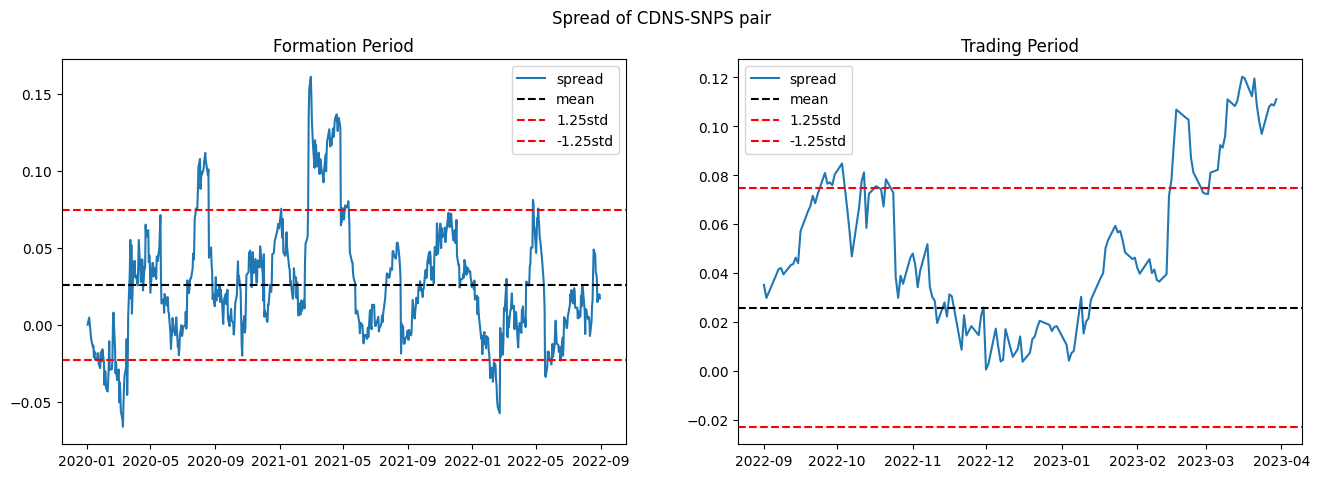

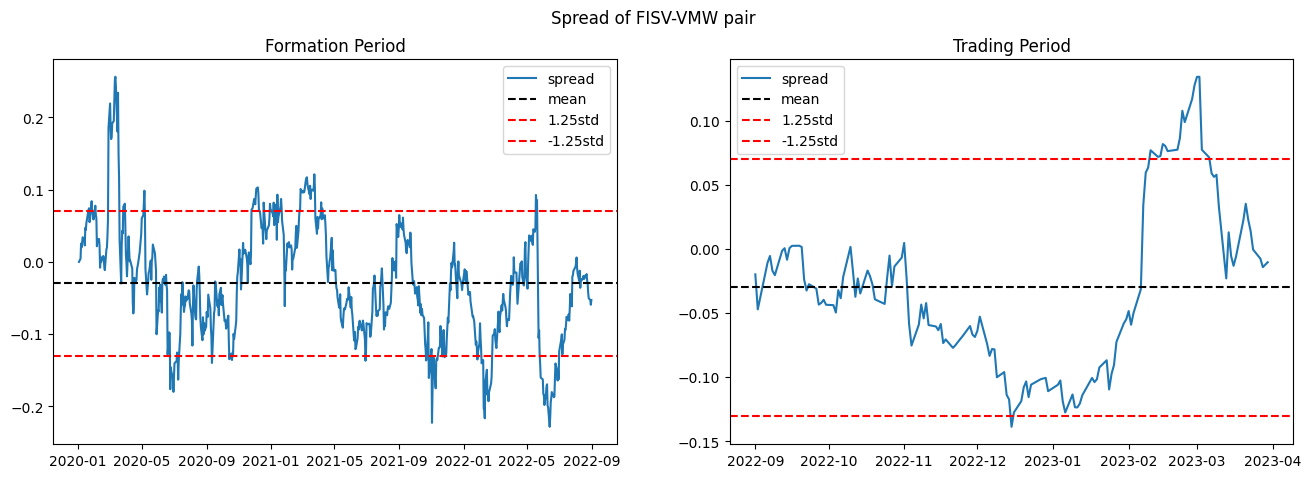

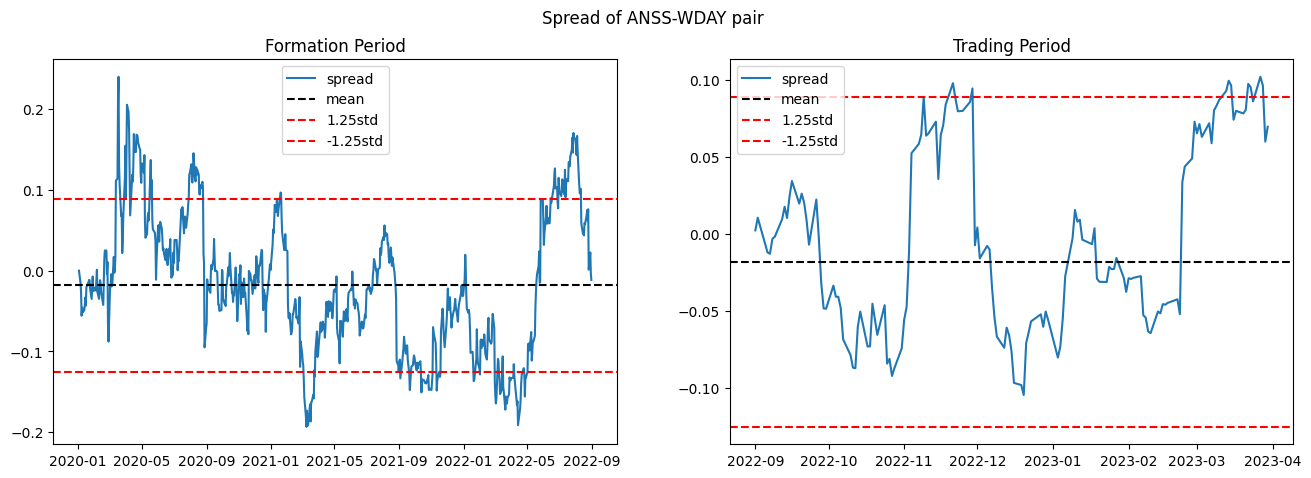

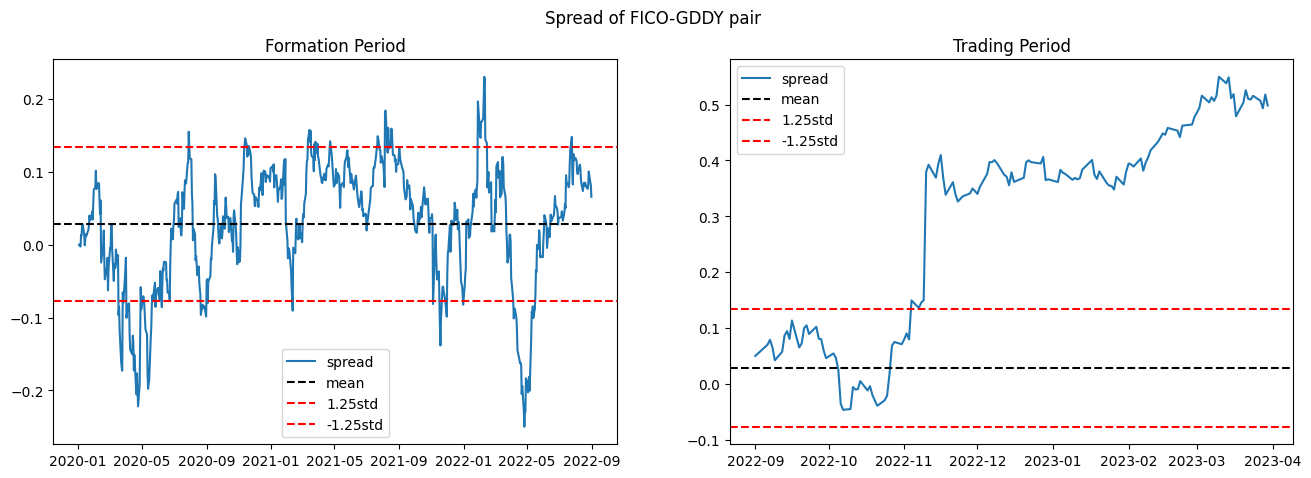

In [793]:
plottings(Top4MinDistance, train_selected, test_selected)

In [798]:
FM1=feature_metrics(Top4MinDistance, test_selected, pairs)
FM1

,Spread SSD,CADF p-value,ADF p-value,Spread Volatility,Pearson Correlation,Numbers of Zero-Crossing,Hurst Exponent,Half Life
CDNS-SNPS,0.737645,0.514696,0.701577,0.038943,0.95165,NaN,0.404622,27.120954
FISV-VMW,0.848861,0.692818,0.554577,0.08012,0.362935,NaN,0.539531,23.305388
ANSS-WDAY,0.71072,0.280378,0.41402,0.08562,0.869895,NaN,0.398247,14.985525
FICO-GDDY,4.143567,0.095666,0.749453,0.084418,0.346172,NaN,0.635721,56.166084


In [780]:
Top4NumZeroCrossing=pairs.sort_values(by='Numbers of Zero-Crossing', ascending=False).index[:4]
Top4NumZeroCrossing

Index(['CDNS-SNPS', 'CHKP-GDDY', 'FISV-VMW', 'LDOS-VMW'], dtype='object')

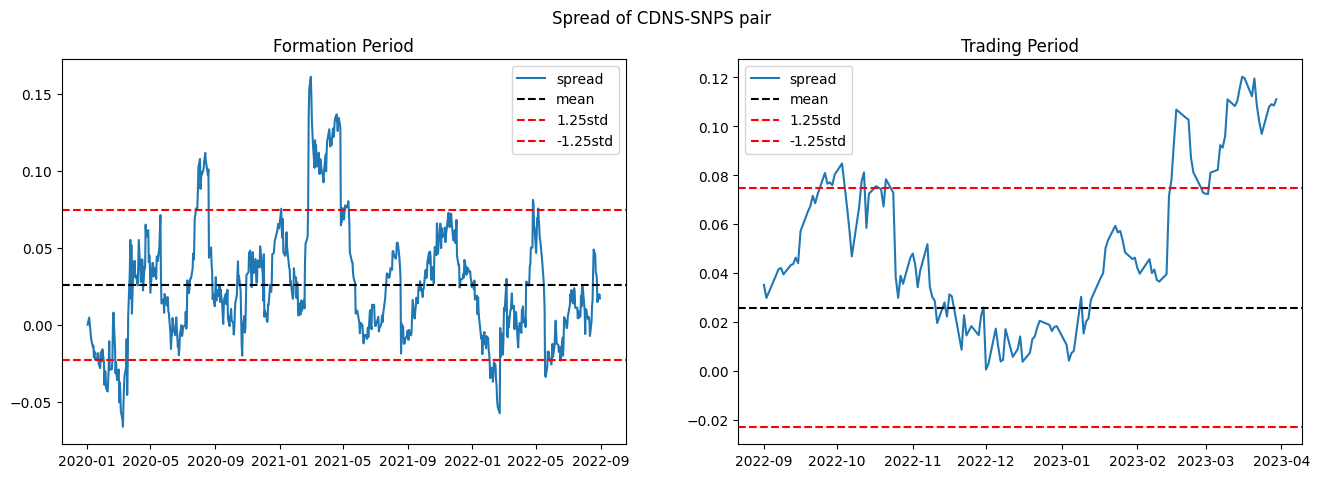

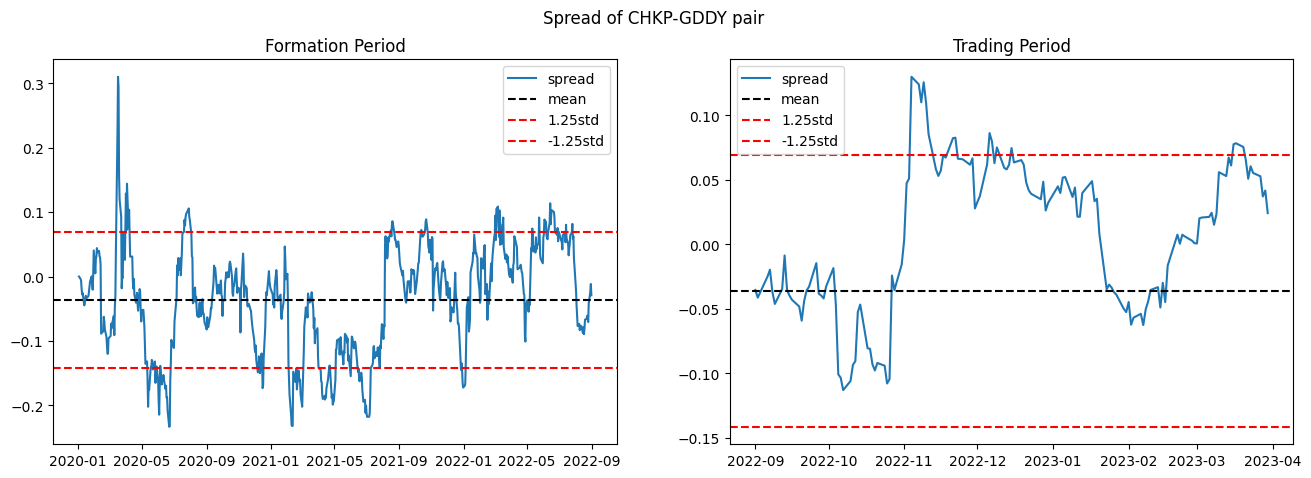

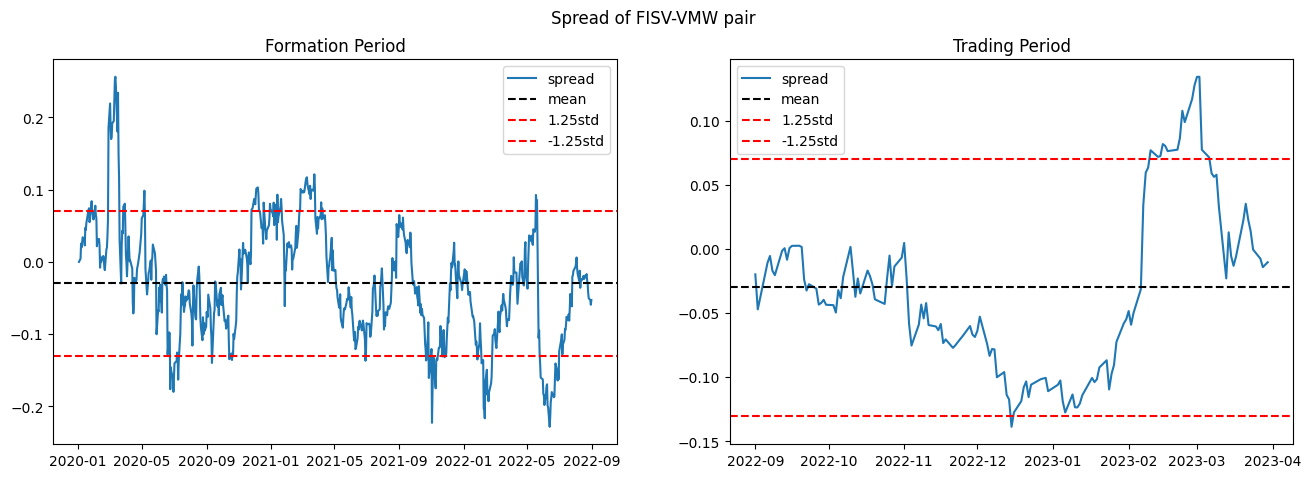

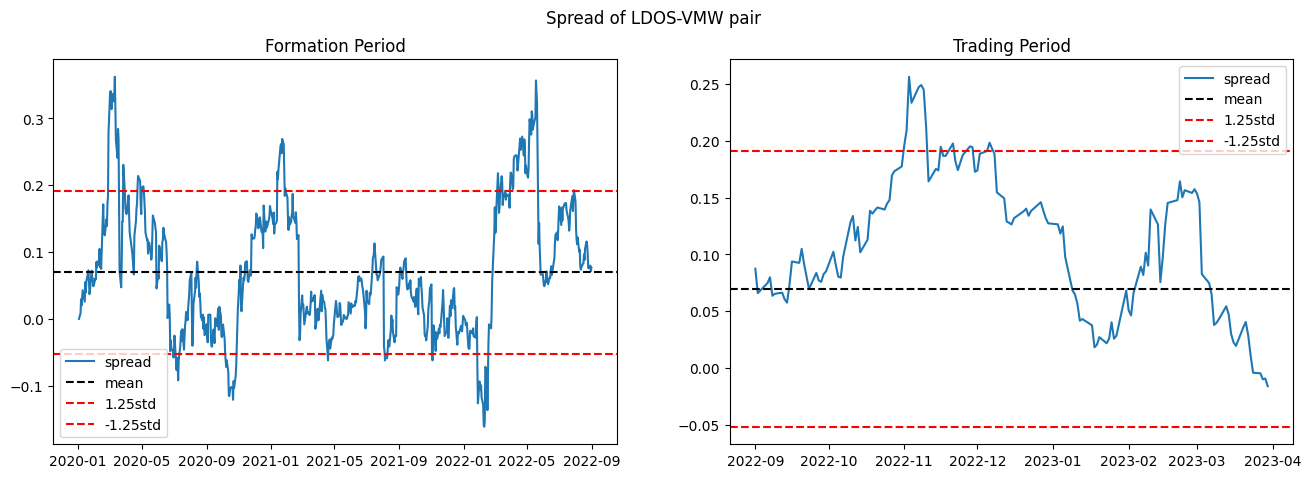

In [794]:
plottings(Top4NumZeroCrossing, train_selected, test_selected)

In [797]:
FM2=feature_metrics(Top4NumZeroCrossing, test_selected, pairs)
FM2

,Spread SSD,CADF p-value,ADF p-value,Spread Volatility,Pearson Correlation,Numbers of Zero-Crossing,Hurst Exponent,Half Life
CDNS-SNPS,0.737645,0.514696,0.701577,0.038943,0.95165,NaN,0.404622,27.120954
CHKP-GDDY,0.700199,0.116251,0.333467,0.084444,0.276984,NaN,0.534491,14.482341
FISV-VMW,0.848861,0.692818,0.554577,0.08012,0.362935,NaN,0.539531,23.305388
LDOS-VMW,1.513597,0.730896,0.779372,0.097288,0.399935,NaN,0.57402,33.867389


In [783]:
Top4r=pairs.sort_values(by='Pearson Correlation', ascending=False).index[:4]
Top4r

Index(['CDNS-SNPS', 'ANSS-WDAY', 'ANSS-CRM', 'ACIW-EEFT'], dtype='object')

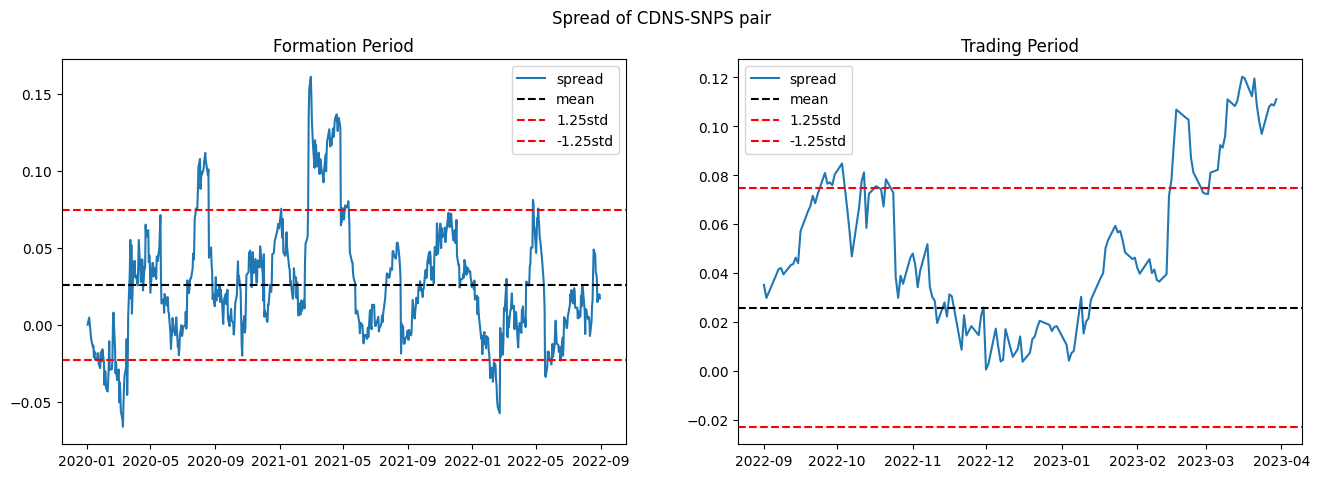

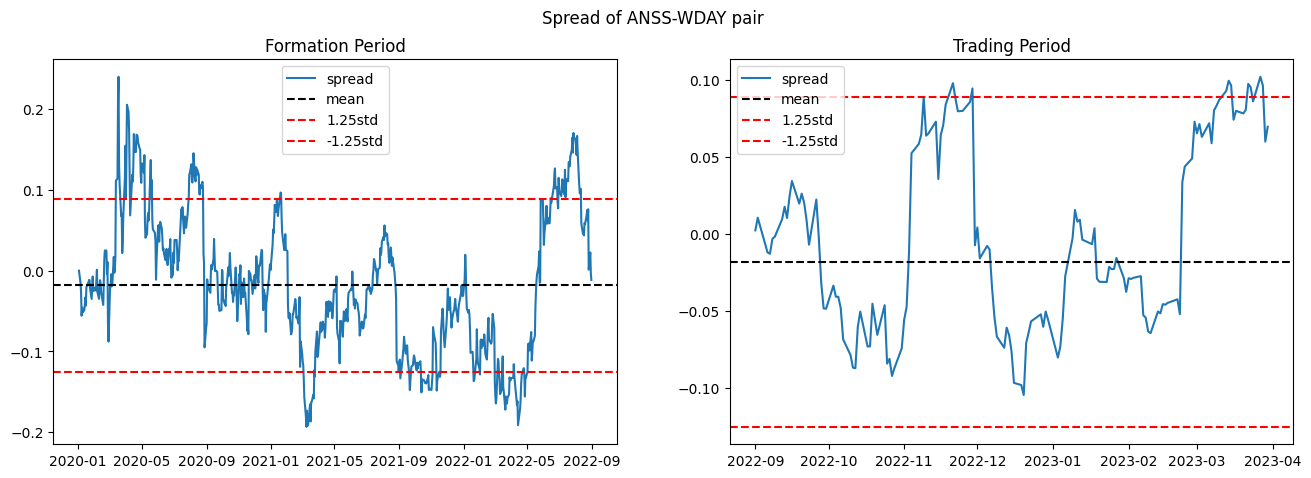

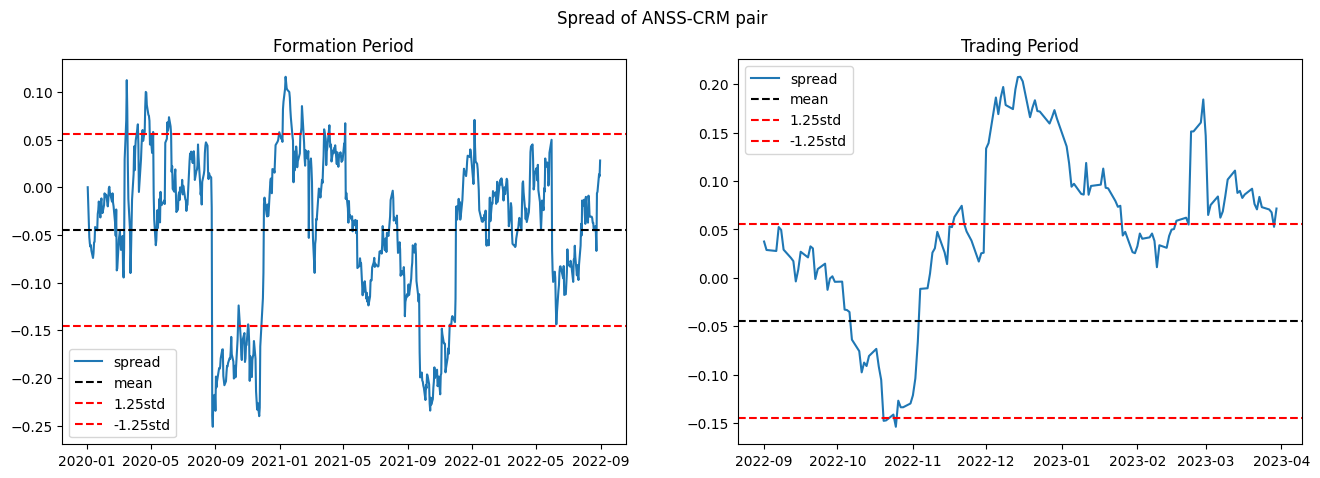

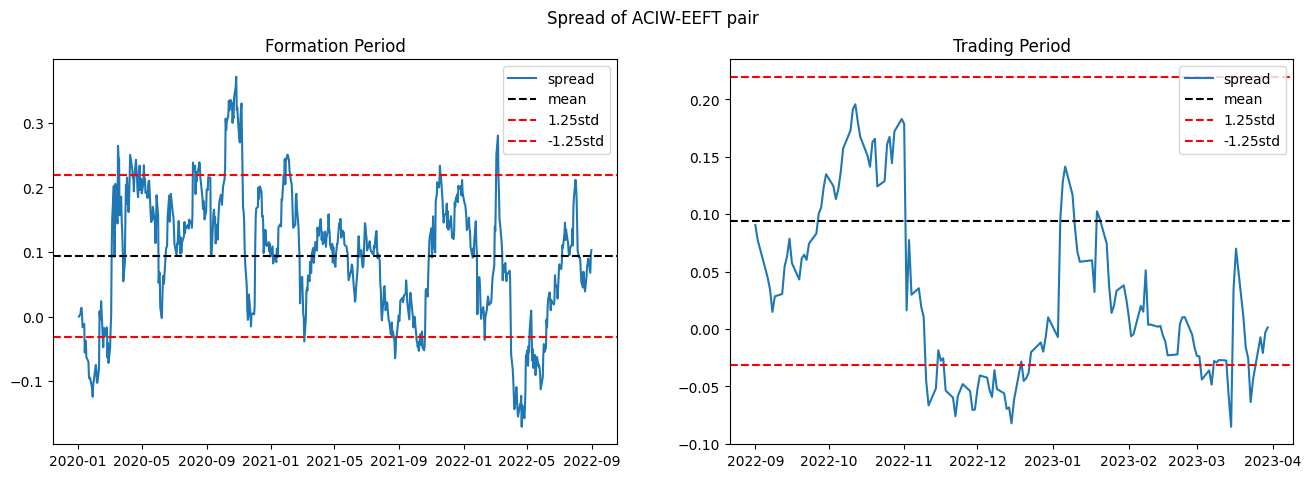

In [795]:
plottings(Top4r, train_selected, test_selected)

In [796]:
FM3=feature_metrics(Top4r, test_selected, pairs)
FM3

,Spread SSD,CADF p-value,ADF p-value,Spread Volatility,Pearson Correlation,Numbers of Zero-Crossing,Hurst Exponent,Half Life
CDNS-SNPS,0.737645,0.514696,0.701577,0.038943,0.95165,NaN,0.404622,27.120954
ANSS-WDAY,0.71072,0.280378,0.41402,0.08562,0.869895,NaN,0.398247,14.985525
ANSS-CRM,1.186321,0.740241,0.535017,0.080289,0.717665,NaN,0.534616,22.190488
ACIW-EEFT,0.958163,0.249791,0.16023,0.100526,0.821196,NaN,0.376156,9.602762


In [786]:
Top4std=pairs.sort_values(by='Spread Volatility', ascending=False).index[:4]
Top4std

Index(['JKHY-QLYS', 'GDDY-IBM', 'GDDY-ROP', 'ACIW-EEFT'], dtype='object')

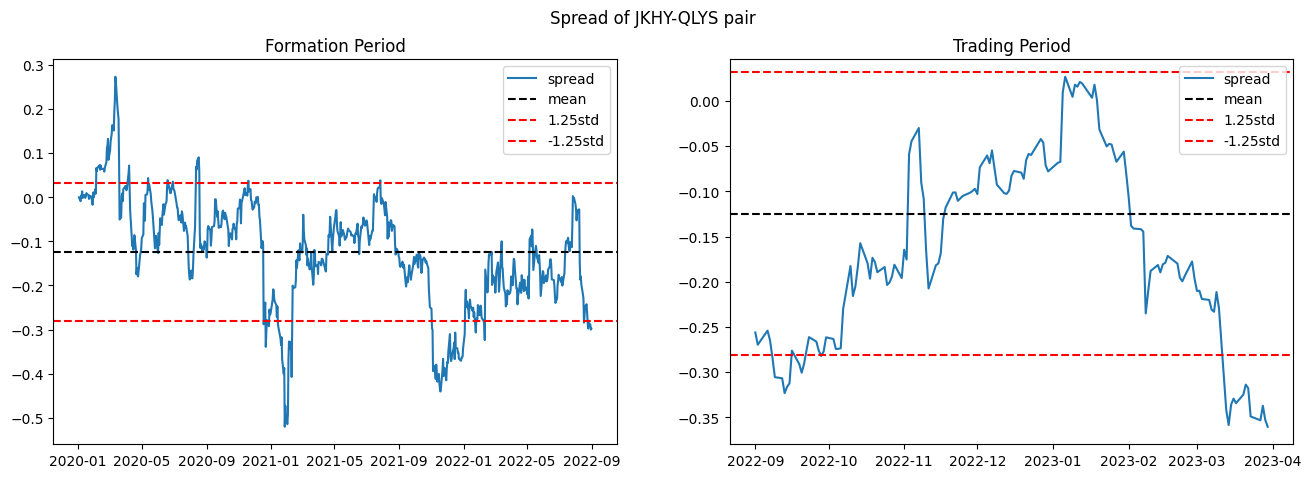

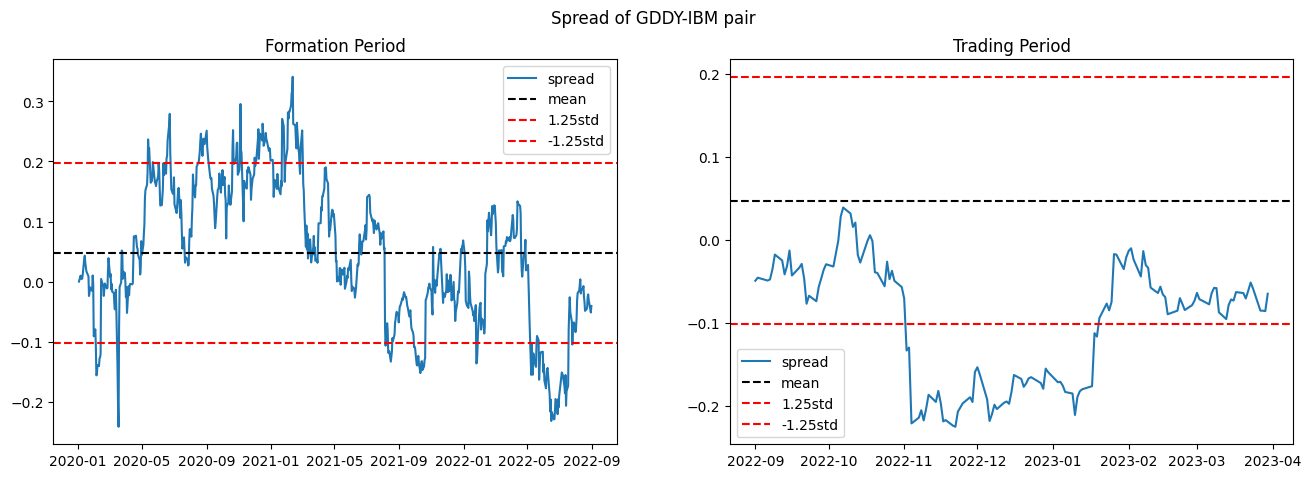

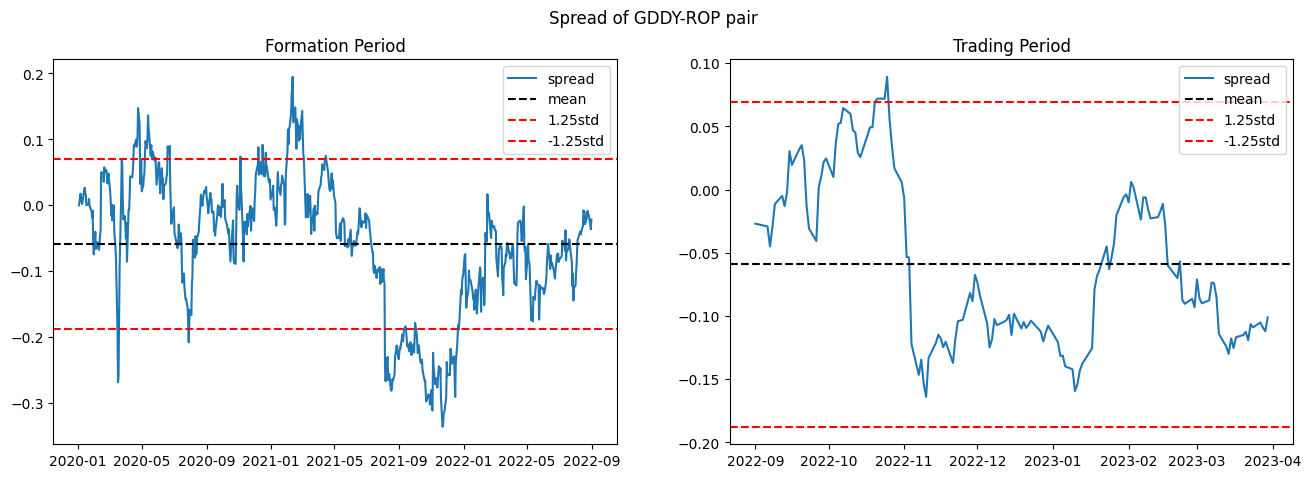

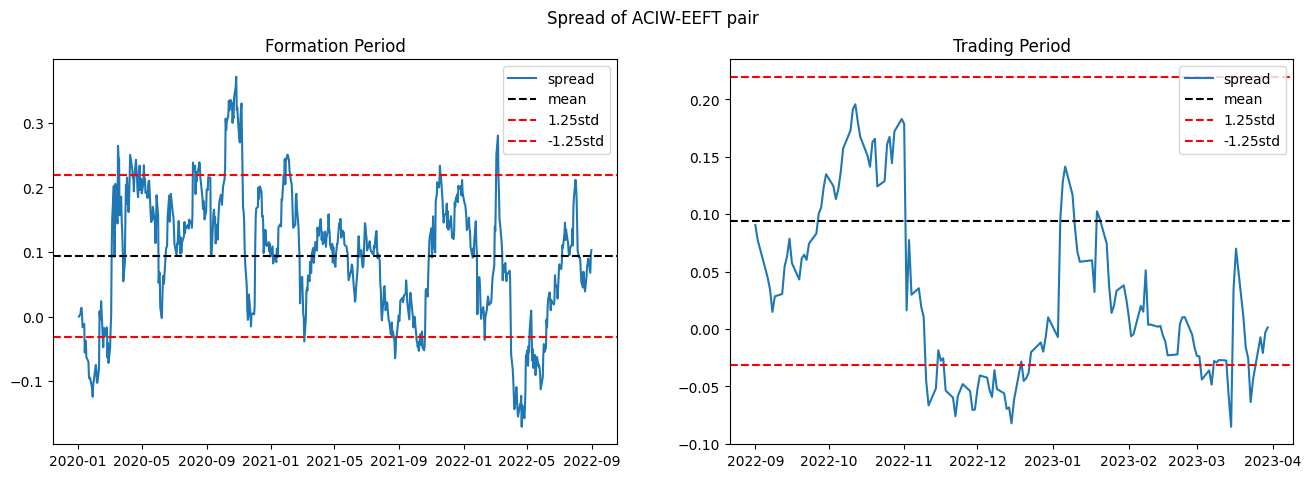

In [799]:
plottings(Top4std, train_selected, test_selected)

In [800]:
FM4=feature_metrics(Top4std, test_selected, pairs)
FM4

,Spread SSD,CADF p-value,ADF p-value,Spread Volatility,Pearson Correlation,Numbers of Zero-Crossing,Hurst Exponent,Half Life
JKHY-QLYS,2.397703,0.667066,0.685788,0.125148,0.405199,NaN,0.521147,38.426338
GDDY-IBM,1.451379,0.11367,0.503623,0.119174,0.231392,NaN,0.525426,21.102135
GDDY-ROP,1.044335,0.110859,0.249785,0.102828,0.295914,NaN,0.519655,23.640964
ACIW-EEFT,0.958163,0.249791,0.16023,0.100526,0.821196,NaN,0.376156,9.602762


In [823]:
#calculate the returns in trading period with the pairs after more criterion selection
pair_rtn = pd.DataFrame(index=test_selected.index, columns=Top4r)

for pair in Top4r:
    s1,s2 = parse_pair(pair)

    spread = pd.Series(test_selected[s1] - test_selected[s2])
    std = pd.Series(FM3['Spread Volatility'])
    positions = pd.DataFrame(index=test_selected.index, columns=[s1,s2])
    short = False #initialization
    long = False

    #trading rules design:
    for i in spread.index:        #use a single trading day as iteration unit
        if (spread.loc[i] > 1.25*std).all():  #short position open
            short = True
            positions.loc[i] = [-1,1] 
        elif (spread.loc[i] < -1.25*std).all():  #long position open
            long = True
            positions.loc[i] = [1,-1] 
        elif short and spread.loc[i] < 0: #short position close
            short = False
            positions.loc[i] = [0,0] 
        elif long and spread.loc[i] > 0: #long position close
            long = False
            positions.loc[i] = [0,0]
    positions.fillna(method='ffill', inplace=True)
    positions.fillna(0, inplace=True)
    returns = (positions.shift() * test_selected[[s1,s2]]).sum(axis=1)
    pair_rtn[pair] = returns

In [824]:
pair_cumrtn = (1 + pair_rtn).cumprod()
pair_cumrtn

,CDNS-SNPS,ANSS-WDAY,ANSS-CRM,ACIW-EEFT
Date,,,,
2022-09-01,1.0,1.0,1.000000,1.000000
2022-09-02,1.0,1.0,1.000000,1.000000
2022-09-06,1.0,1.0,1.000000,1.000000
2022-09-07,1.0,1.0,1.000000,1.000000
2022-09-08,1.0,1.0,1.000000,1.000000
...,...,...,...,...
2023-03-24,1.0,1.0,0.000043,0.006593
2023-03-27,1.0,1.0,0.000040,0.006593
2023-03-28,1.0,1.0,0.000038,0.006593


Text(0.5, 1.0, 'Total Traded Pairs Return Rate')

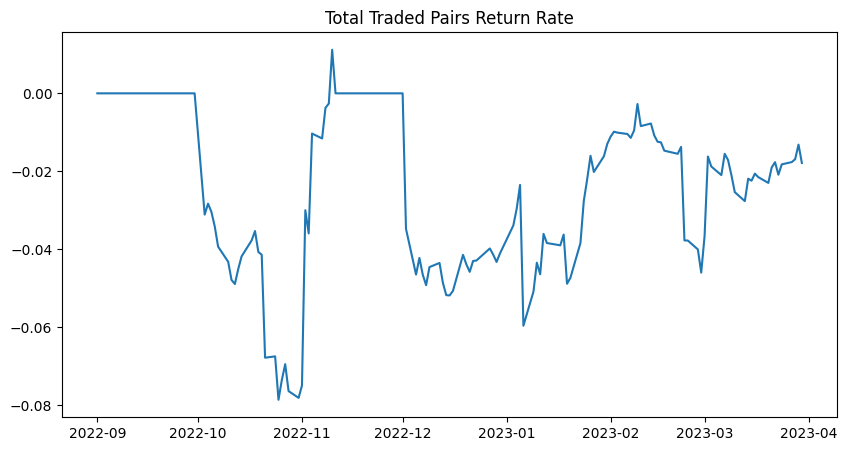

In [825]:
total_rtn = pair_rtn.sum(axis=1) / len(pair_rtn.columns)
plt.figure(figsize=(10,5))
plt.plot(total_rtn)
plt.title('Total Traded Pairs Return Rate')

Text(0.5, 1.0, 'Traded Pairs Cumulative Return Rate')

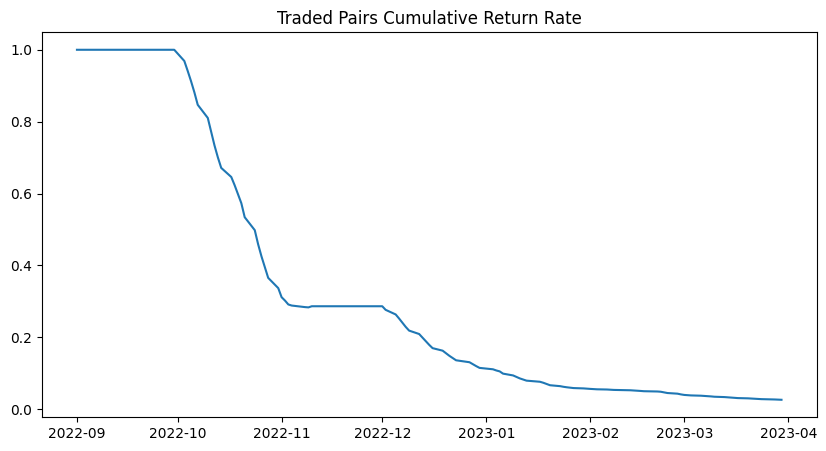

In [826]:
total_cumrtn = (1 + total_rtn).cumprod()
plt.figure(figsize=(10,5))
plt.plot(total_cumrtn)
plt.title('Traded Pairs Cumulative Return Rate')

In [766]:
benchmark=yf.download('XKII','2022-09-01','2023-03-31')['Adj Close'].pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.9/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2022-09-02
End date,2023-03-30
Total months,6
,Backtest
Annual return,-99.831%
Cumulative returns,-97.395%
Annual volatility,33.682%
Sharpe ratio,-18.54
Calmar ratio,-1.03
Stability,0.98
Max drawdown,-97.395%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,97.39,2022-09-30,2023-03-30,NaT,NaN
1,NaN,NaT,NaT,NaT,NaN
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.9/dist-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warni

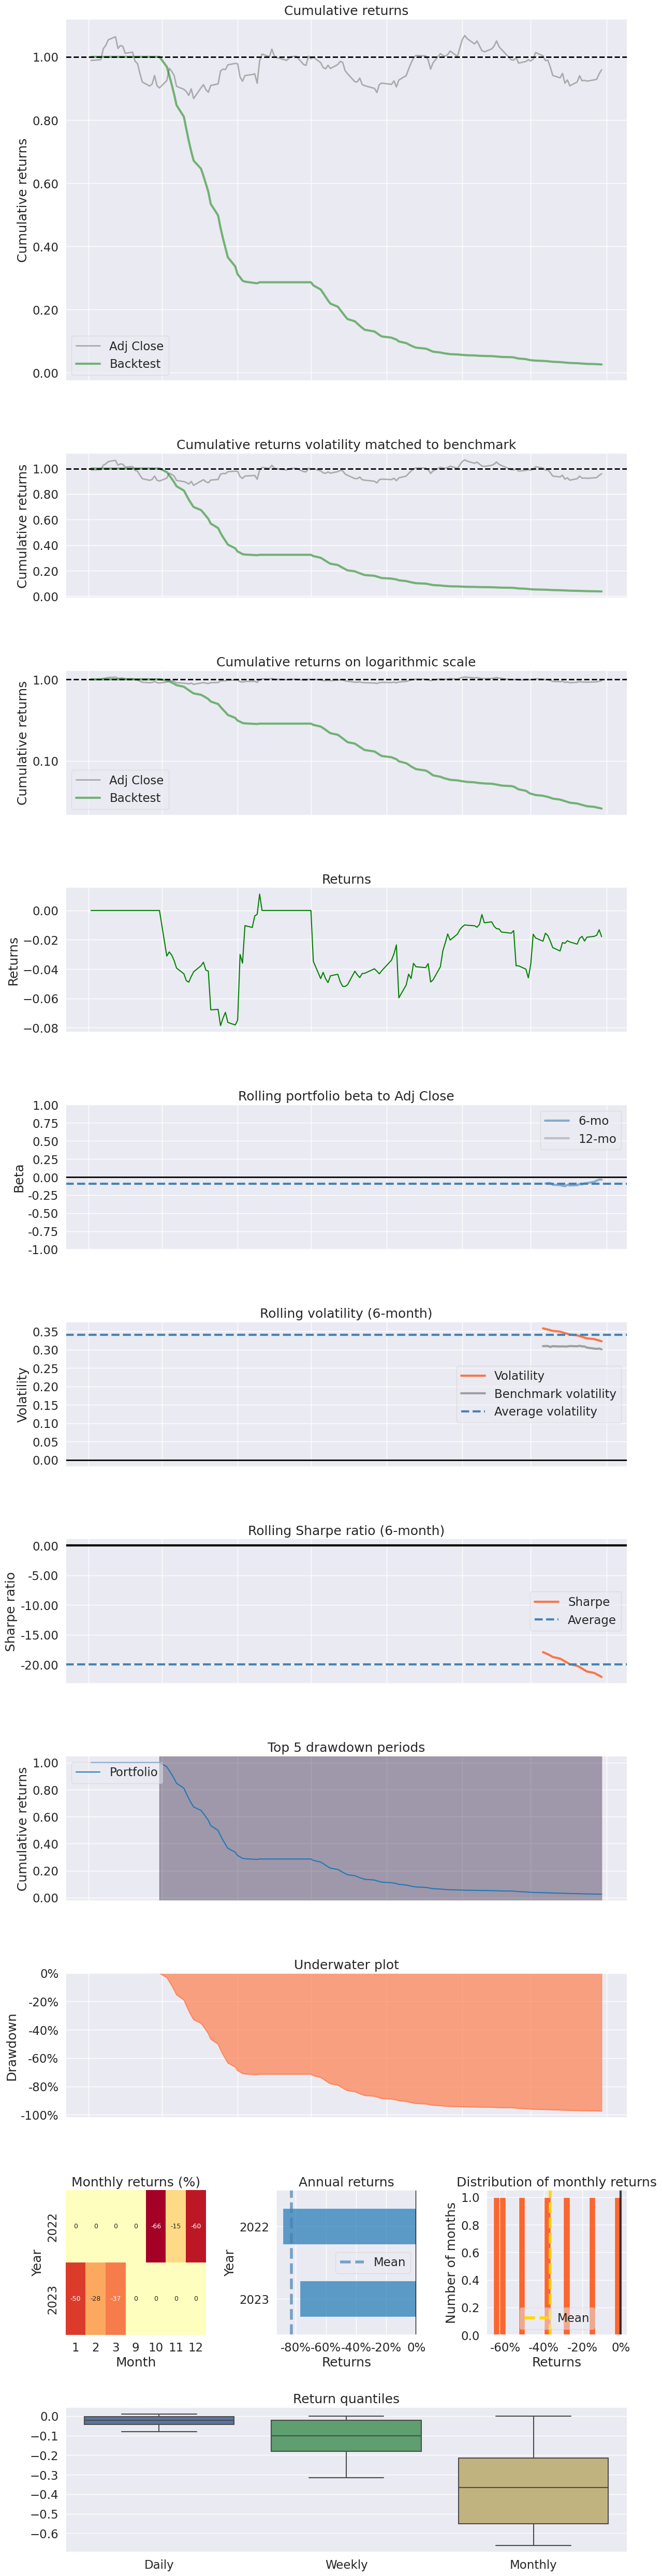

In [827]:
performance= pf.create_returns_tear_sheet(total_rtn, benchmark_rets=benchmark)

- Important Notes:
  - pairs trading with minimum distance, if we want to improve performance, more frequent transcations are needed, exclude considering the transcation costs. The threshold of trading signal design can be optimized using algorithm.
  - if the whole trend is decrease, larger std is not a good choice for generating larger returns.
  - the trade timing and stock industry performance are importance topics to consider for stock selection
    - stop loss point can be set in trading strategy next time.
  - Among these 4 methods of pairs selection, top4 pearson correlation performs best.